# K-Means Clustering:-
K-Means Clustering is an unsupervised machine learning algorithm that helps group data points into clusters based on their inherent similarity. Unlike supervised learning, where we train models using labeled data, K-Means is used when we have data that is not labeled and the goal is to uncover hidden patterns or structures. For example, an online store can use K-Means to segment customers into groups like "Budget Shoppers," "Frequent Buyers," and "Big Spenders" based on their purchase history.

The algorithm will categorize the items into "
k
k" groups or clusters of similarity. To calculate that similarity we will use the Euclidean distance as a measurement. The algorithm works as follows:  

Initialization: We begin by randomly selecting k cluster centroids.
Assignment Step: Each data point is assigned to the nearest centroid, forming clusters.
Update Step: After the assignment, we recalculate the centroid of each cluster by averaging the points within it.
Repeat: This process repeats until the centroids no longer change or the maximum number of iterations is reached.


The goal is to partition the dataset into 
k
k clusters such that data points within each cluster are more similar to each other than to those in other clusters.

# References:-
#1 GeeksforGeeks: K-Means Clustering – Introduction
A beginner-friendly explanation of K-Means clustering and its applications, especially in NLP.

#2 TutorialsPoint: K-Means Clustering Algorithm
Covers the algorithm's working, advantages, limitations, and practical considerations.

#3 Analytics Vidhya: Comprehensive Guide to K-Means Clustering
A detailed guide with concepts, methods, challenges, and Python code examples.


In [47]:
# =========================
# Step 1: Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
# Step 1: Load Dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\cleaned_DataAnalysis\archive (10).zip")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [49]:
# =========================
# Step 2: Load Dataset
# =========================

# Drop customer key (not useful for clustering)
X = df.drop(columns=["Customer Key"])

In [50]:
# =========================
# Step 3: Feature Scaling
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

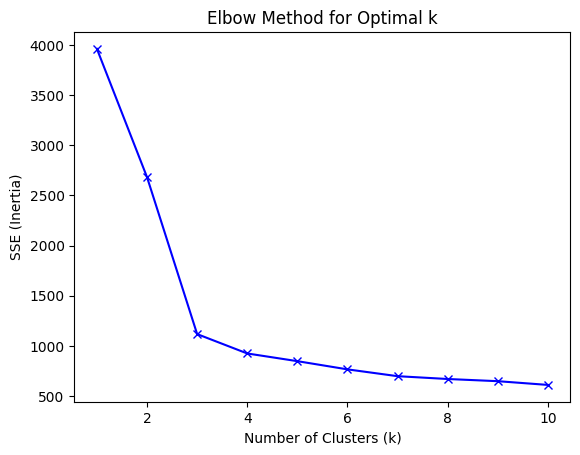

In [51]:
# =========================
# Step 4: Elbow Method (Sklearn)
# =========================
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, "bx-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

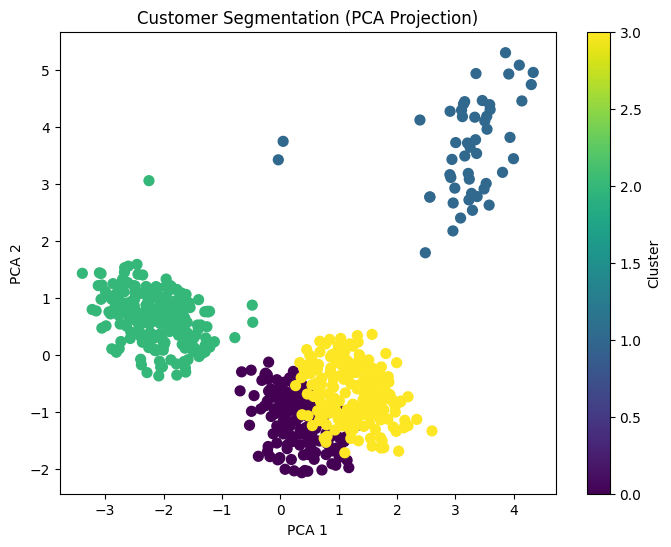

In [52]:
# Step 5: Train KMeans with chosen k (say k=4)
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
# Step 6: Reduce dimensions for visualization (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="viridis", s=50)
plt.title("Customer Segmentation (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [53]:
# =========================
# Step 5: Sklearn KMeans
# =========================
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)  # assume k=4 from elbow
df["Cluster_sklearn"] = kmeans.fit_predict(X_scaled)

In [54]:
# Step 6: Scratch KMeans Implementation
# =========================
def initialize_centroids(X, k):
    np.random.seed(42)
    random_idx = np.random.permutation(X.shape[0])[:k]
    return X[random_idx]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = []
    for j in range(k):
        cluster_points = X[labels == j]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append(X[np.random.randint(0, X.shape[0])])
    return np.array(new_centroids)

def kmeans_scratch(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

# Run Scratch KMeans
centroids_scratch, labels_scratch = kmeans_scratch(X_scaled, 4)
df["Cluster_scratch"] = labels_scratch

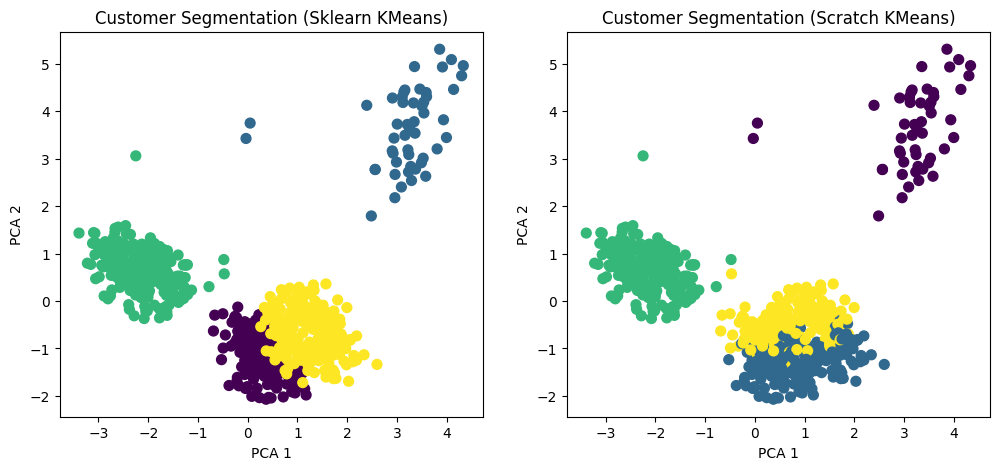

In [55]:
# Step 7: PCA for Visualization
# =========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Sklearn Clusters
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster_sklearn"], cmap="viridis", s=50)
plt.title("Customer Segmentation (Sklearn KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Scratch Clusters
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster_scratch"], cmap="viridis", s=50)
plt.title("Customer Segmentation (Scratch KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()

In [56]:
# Step 8: Compare Centroids
# =========================
print("Sklearn Centroids (scaled):\n", kmeans.cluster_centers_)
print("\nScratch Centroids (scaled):\n", centroids_scratch)

Sklearn Centroids (scaled):
 [[-0.09135437 -0.59114148  0.3514901   0.73625508 -0.5434555  -0.57573819]
 [ 1.4737145   2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]
 [-1.12866766 -0.57830145 -1.04904475 -0.90386869  0.31680173  1.13305472]
 [ 0.91549793  0.41400388  0.39335338  0.62853652 -0.56334503 -0.53513545]]

Scratch Centroids (scaled):
 [[ 1.4737145   2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]
 [ 0.44541658 -0.08904777  0.35679514  1.29571325 -0.54390138 -0.5750638 ]
 [-1.12599761 -0.58860585 -1.04815506 -0.90406166  0.32064302  1.14365291]
 [ 0.48735686  0.03983173  0.38426924  0.06418713 -0.56497122 -0.53509379]]


In [57]:

from sklearn.metrics import silhouette_score

# Drop non-numeric columns (like Customer Key)
X = df.drop(columns=['Customer Key'], errors='ignore')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [58]:
# Scratch K-Means Implementation
# ===============================
def kmeans_scratch(X, k=4, max_iters=100, tol=1e-4):
    # Random centroid initialization
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for iteration in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
        
    return labels, centroids, iteration + 1


In [59]:
# Run scratch KMeans
y_scratch, centroids_scratch, n_iter_scratch = kmeans_scratch(X_scaled, k=4)


In [60]:
# Sklearn KMeans Implementation
# ===============================
kmeans_sklearn = KMeans(n_clusters=4, random_state=42, n_init=10)
y_sklearn = kmeans_sklearn.fit_predict(X_scaled)


In [61]:
# Metric Calculations
# ===============================
silhouette_scratch = silhouette_score(X_scaled, y_scratch)
silhouette_sklearn = silhouette_score(X_scaled, y_sklearn)

inertia_scratch = np.sum([
    np.sum((X_scaled[y_scratch == i] - centroids_scratch[i])**2)
    for i in range(4)
])
inertia_sklearn = kmeans_sklearn.inertia_

iterations_scratch = n_iter_scratch
iterations_sklearn = kmeans_sklearn.n_iter_


In [62]:
#  Results in DataFrame + CSV
# ===============================
results = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Inertia (SSE)', 'Iterations to Converge'],
    'Scratch Implementation': [round(silhouette_scratch, 3),
                               round(inertia_scratch, 3),
                               iterations_scratch],
    'Sklearn KMeans': [round(silhouette_sklearn, 3),
                       round(inertia_sklearn, 3),
                       iterations_sklearn]
})

print("🔹 KMeans Performance Comparison:")
display(results)

results.to_csv("kmeans_performance_comparison.csv", index=False)
print("\n✅ Performance comparison saved as 'kmeans_performance_comparison.csv'")

🔹 KMeans Performance Comparison:


,Metric,Scratch Implementation,Sklearn KMeans
0,Silhouette Score,0.376,0.562
1,Inertia (SSE),2522.059,1366.469
2,Iterations to Converge,4.000,3.000



✅ Performance comparison saved as 'kmeans_performance_comparison.csv'


In [63]:
# Conclusion:-
# Hence,we successfully implemented K-Means Clustering Algorithm on Customer Segmentation dataset and visualized the clusters with their centroids.
# We also compared Scratch implemenattion with SK learn Kmeans Clustering method and the result was very nearer to each other.
# It's all about assigning appropraite amount of clusters and centroid to each clusters.
#Identifying clusters----->Assigning centroid to each clusters----->Updating Centroids by taking means of all data-points within each clusters--->Again updating centroids according to the entry on data-points----->Untill Convergence of centroids within each clusters don't occur,i.e:Centroids should get stabilised and further displacement.